# Color and Gradients

Now it's time to combine what you know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:

## How images identified
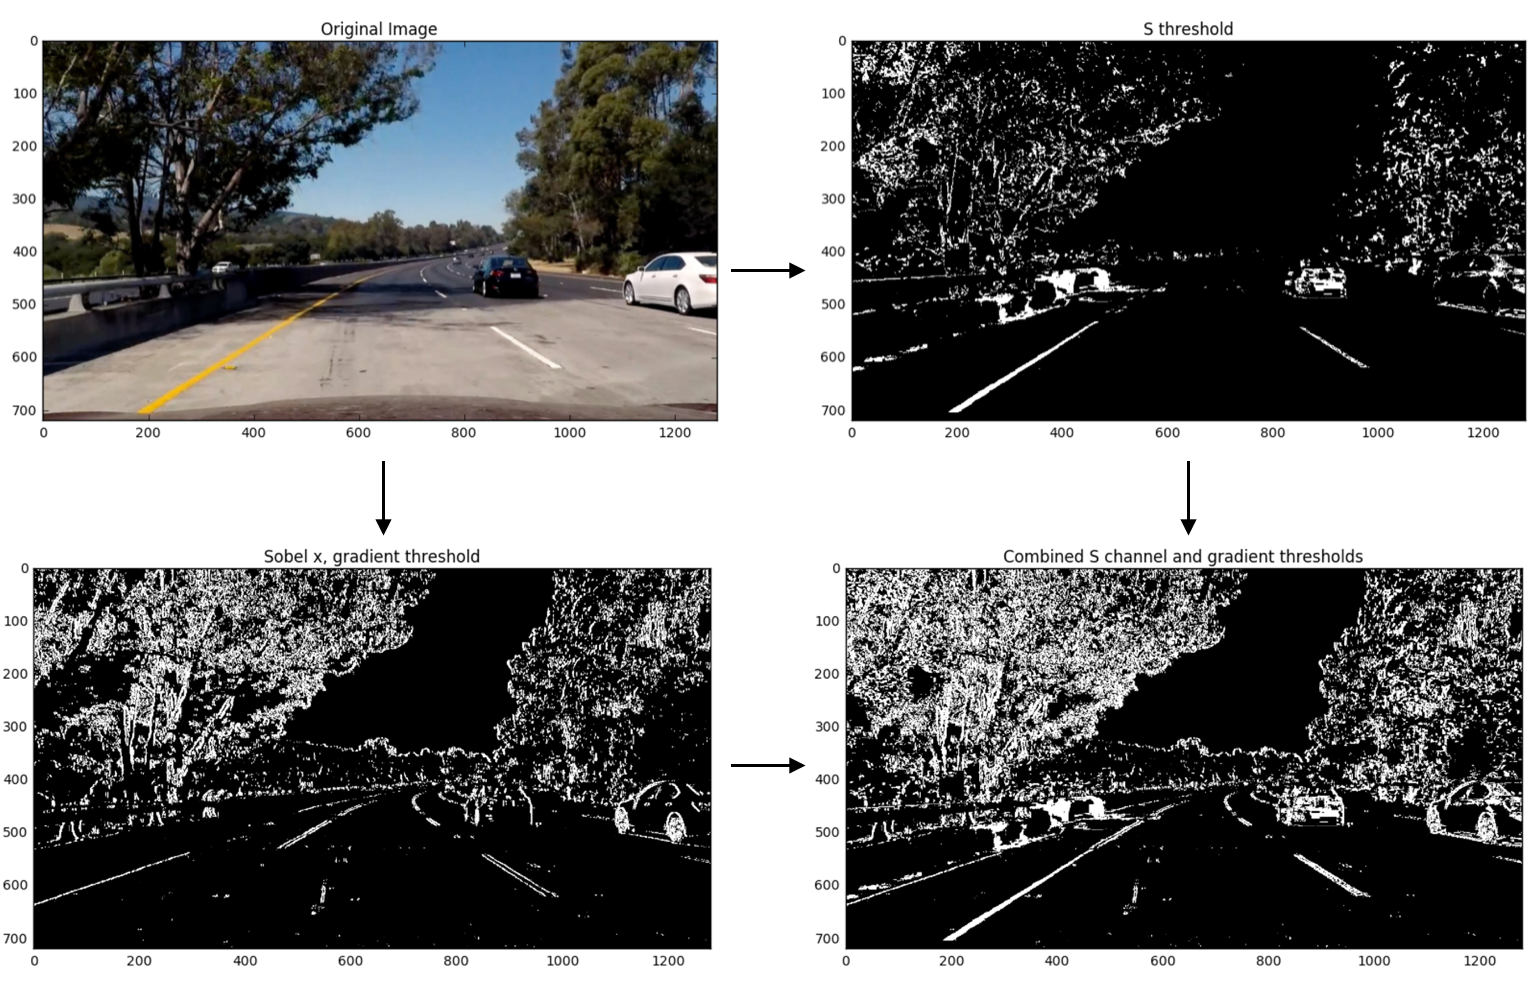
Comined color and gradient thresholds for lane detection.

We call the function definition defined in both [apply_sobel.py](apply_sobel.py) and [hls_threshold.py](hls_threshold.py)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import funntion implemented from appyl_sobel.py

In [2]:
import os
import sys

sys.path.append(os.path.abspath("apply_sobel.py"))
from apply_sobel import * 

sys.path.append(os.path.abspath("hls_threshold.py"))
from hls_threshold import * 

Read in an image to start the pipeline

In [3]:
image = mpimg.imread('test_images/bridge_shadow.jpg')

## Prepare the pipeline

In [4]:
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    
    # Threshold x gradient
    sxbinary = abs_sobel_thresh(img, orient='x', thresh=sx_thresh)
    
    # Threshold color channel
    s_binary = hls_select(image, thresh=s_thresh)
    
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return color_binary, combined_binary

## Call the pipeline

In [5]:
color_result, combined_result = pipeline(image)

Plot the result

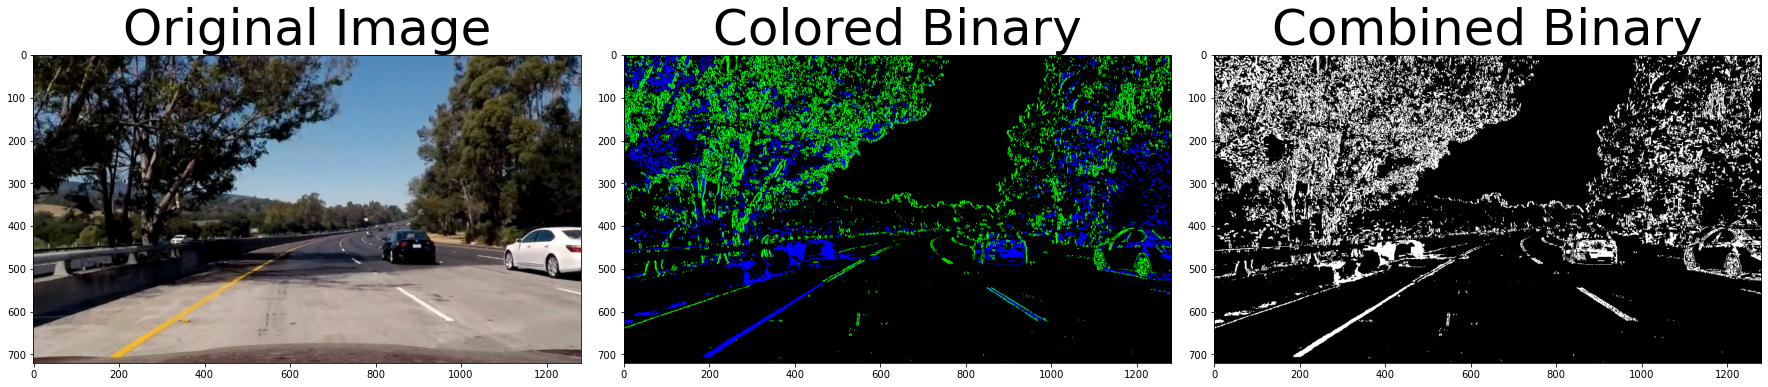

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(color_result)
ax2.set_title('Colored Binary', fontsize=50)
ax3.imshow(combined_result, cmap='gray')
ax3.set_title('Combined Binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)